# CHAPTER 6 - Elman Neural Networks  
_pg. 83-94_

# PART 1
_pg. 84-85, 88-89_

## Prepare Your Data for Easy Use

In [1]:
import numpy as np
import pandas as pd

loc = "/home/dpindk/irlab/big-data-summer-school-2017/COE.csv"
temp = pd.read_csv(loc)
data = temp.drop(temp.columns [[0,1]], axis=1)

y = data["COE$"]

x = data.drop(data.columns[[0,4]], axis=1)
x = x.apply(np.log)
x = pd.concat([x, data["Open?"]], axis=1)

## Scaling to [0,1] Range

In [2]:
from sklearn import preprocessing

scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape((len(x), 4))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y), 1))
y = np.log(y)
y = scaler_y.fit_transform(y)

In [3]:
# pyneurgen module requires lists
y = y.tolist()
x = x.tolist()

## Use this Python Library for Rapid Results

In [4]:
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.recurrent import ElmanSimpleRecurrent

In [5]:
import random
random.seed(2016)

In [6]:
fit1 = NeuralNet()

input_nodes = 4
hidden_nodes = 7
output_nodes = 1

fit1.init_layers(input_nodes, [hidden_nodes], output_nodes, ElmanSimpleRecurrent())
fit1.randomize_network()
fit1.layers[1].set_activation_type("sigmoid")
fit1.set_learnrate(0.05)
fit1.set_all_inputs(x)
fit1.set_all_targets(y)

# PART 2
_pg. 91-93_

## A Super Simple Way to Fit the Model

In [7]:
length = len(x)
learn_end_point = int(length * 0.95)
fit1.set_learn_range(0, learn_end_point)
fit1.set_test_range(learn_end_point + 1, length - 1)

## The `learn` Function

In [8]:
fit1.learn(epochs=100, show_epoch_results=True, random_testing=False)

epoch: 0 MSE: 0.00573194277476
epoch: 1 MSE: 0.00197294353497
epoch: 2 MSE: 0.00190746802167
epoch: 3 MSE: 0.00184641750107
epoch: 4 MSE: 0.00178925912178
epoch: 5 MSE: 0.00173554922549
epoch: 6 MSE: 0.00168491665439
epoch: 7 MSE: 0.00163704950601
epoch: 8 MSE: 0.00159168453504
epoch: 9 MSE: 0.00154859860756
epoch: 10 MSE: 0.00150760176151
epoch: 11 MSE: 0.00146853153596
epoch: 12 MSE: 0.00143124831164
epoch: 13 MSE: 0.00139563146424
epoch: 14 MSE: 0.00136157617646
epoch: 15 MSE: 0.00132899078809
epoch: 16 MSE: 0.00129779458866
epoch: 17 MSE: 0.00126791597635
epoch: 18 MSE: 0.00123929092208
epoch: 19 MSE: 0.00121186168867
epoch: 20 MSE: 0.00118557576435
epoch: 21 MSE: 0.00116038497679
epoch: 22 MSE: 0.00113624475939
epoch: 23 MSE: 0.00111311354629
epoch: 24 MSE: 0.00109095227597
epoch: 25 MSE: 0.00106972398652
epoch: 26 MSE: 0.00104939348795
epoch: 27 MSE: 0.0010299270993
epoch: 28 MSE: 0.00101129243971
epoch: 29 MSE: 0.000993458264383
epoch: 30 MSE: 0.000976394337621
epoch: 31 MSE: 0.

## Test Set MSE

In [9]:
mse = fit1.test()
print "test set  MSE = ", np.round(mse, 6)

test set  MSE =  0.000118


In [10]:
pred = [item[1][0] for item in fit1.test_targets_activations]
pred1 = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))
pred1 = np.exp(pred1)

In [11]:
pred1

array([[ 11417.68582666],
       [ 11349.47816217],
       [ 11603.83950837],
       [ 13018.23591198],
       [ 13672.63946973],
       [ 14767.88359248],
       [ 13942.49440269],
       [ 12515.84962128],
       [ 12251.28644488],
       [ 13380.79744629],
       [ 13733.88003737],
       [ 13614.31119816]])

## Plotting the Results

In [12]:
obs = [item[0][0] for item in fit1.test_targets_activations]
obs = scaler_y.inverse_transform(np.array(obs).reshape((len(obs), 1)))
obs = np.exp(obs)
obs_max = obs + 1500
obs_min = obs - 1500

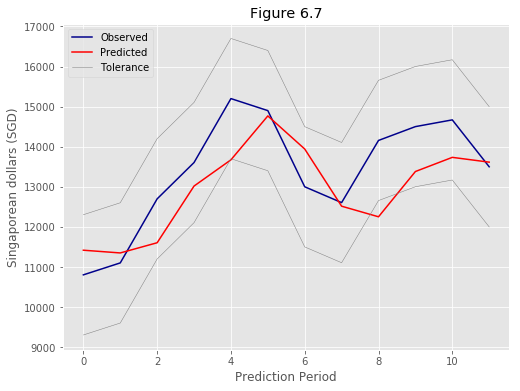

In [13]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

plt.plot(range(len(obs)), obs, "-", label="Observed", color="darkblue")

plt.plot(range(len(pred1)), pred1, "-", label="Predicted", color="red")

plt.plot(range(len(obs)), obs_min, "-", label="Tolerance", color="grey", linewidth="0.5")
plt.plot(range(len(obs)), obs_max, "-", color="grey", linewidth="0.5")

plt.title("Figure 6.7")
plt.xlabel("Prediction Period")
plt.ylabel("Singaporean dollars (SGD)")
plt.legend()
plt.show()